In [1]:
from scenario_io import load_scenario

for name in [
    "corridor_001.json",
    "corridor_002.json",
    "bad_overlap.json",
    "out_of_bounds.json",
]:
    s = load_scenario(f"scenarios/handwritten/{name}")
    print(name, "->", s.metadata["scenario_id"], "| agents:", len(s.agents))


corridor_001.json -> corridor_001 | agents: 3
corridor_002.json -> corridor_002 | agents: 3
bad_overlap.json -> bad_overlap | agents: 2
out_of_bounds.json -> out_of_bounds | agents: 2


In [2]:
from scenario_validator import validate_and_repair
from scenario_io import load_scenario

for name in [
    "corridor_001.json",
    "corridor_002.json",
    "bad_overlap.json",
    "out_of_bounds.json",
]:
    print("=== ", name, "===")
    s = load_scenario(f"scenarios/handwritten/{name}")
    s_fixed, logs = validate_and_repair(s)
    for line in logs:
        print("  -", line)
    print()


===  corridor_001.json ===

===  corridor_002.json ===

===  bad_overlap.json ===
  - Jittered overlapping agents 0 and 1.

===  out_of_bounds.json ===
  - Clamped goal of agent 0 from (10.00,0.00) to (4.00,0.00).
  - Clamped start of agent 1 from (-5.00,1.50) to (-4.00,1.50).
  - Clamped goal of agent 1 from (-10.00,1.50) to (-4.00,1.50).



In [7]:
from run_scenario import run_once

_ = run_once("scenarios/handwritten/corridor_001.json", visualize=False)
_ = run_once("scenarios/handwritten/corridor_002.json", visualize=False)
_ = run_once("scenarios/handwritten/bad_overlap.json", visualize=False)
_ = run_once("scenarios/handwritten/out_of_bounds.json", visualize=False)


Loaded scenario_id = corridor_001
Validator logs:
  (none)
Simulation finished in 24 steps.
Final sim.status: AllAtGoal
  time_to_goal: 24
  collision: False
  path_efficiency: 1.5522886090420451
  avg_speed: 0.939865221736975
  min_human_dist: 1.10026909897388
Loaded scenario_id = corridor_002
Validator logs:
  (none)
Simulation finished in 50 steps.
Final sim.status: AllAtGoal
  time_to_goal: 50
  collision: False
  path_efficiency: 1.0180629013509697
  avg_speed: 0.9803921568627451
  min_human_dist: 1.0744785895767057
Loaded scenario_id = bad_overlap
Validator logs:
  - Jittered overlapping agents 0 and 1.
  - Jittered overlapping agents 0 and 1.
Simulation finished in 10 steps.
Final sim.status: AllAtGoal
  time_to_goal: 10
  collision: False
  path_efficiency: 1.195393045105457
  avg_speed: 0.8181649371308175
  min_human_dist: 2.2529148850347904
Loaded scenario_id = out_of_bounds
Validator logs:
  - Clamped goal of agent 0 from (10.00,0.00) to (4.00,0.00).
  - Clamped start of age

Loaded scenario_id = corridor_001
Validator logs:
  (none)
Simulation finished in 35 steps.
Final sim.status: AllAtGoal
  time_to_goal: 35
  collision: False
  path_efficiency: 2.4176825817465497
  avg_speed: 0.8686478946915472
  min_human_dist: 0.9397935290855448


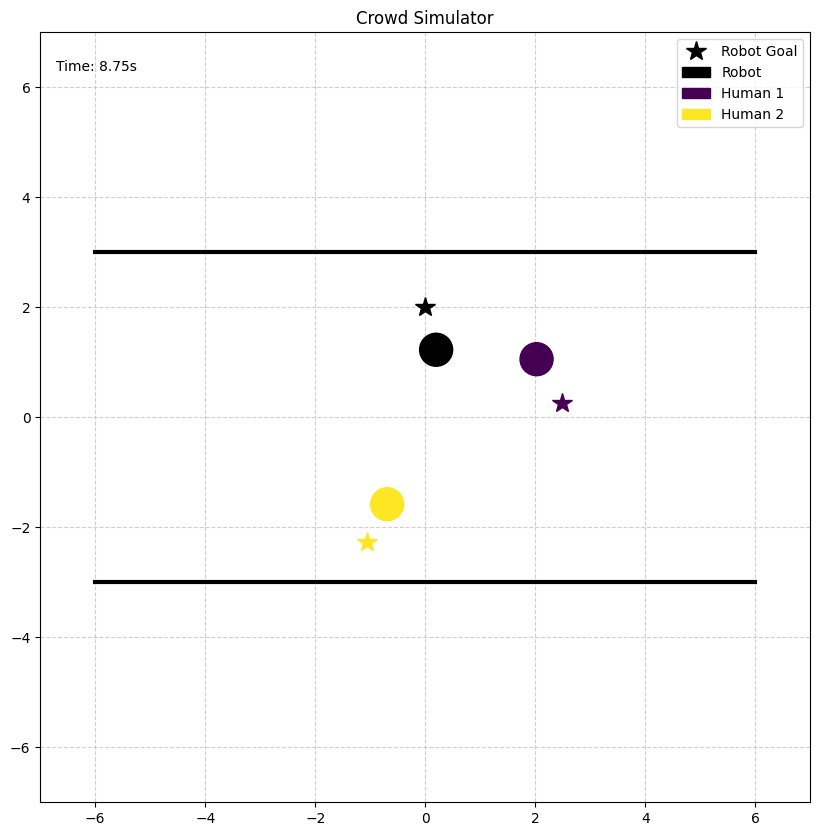

In [9]:
from IPython.display import HTML

metrics, anim_html = run_once("scenarios/handwritten/corridor_001.json",visualize=True)
anim_html
